In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import random

random.seed(123)

In [ ]:
url = 'https://raw.githubusercontent.com/ow-hash/Portfolio/main/Data/Census%20Income.csv?token=GHSAT0AAAAAACQCFGRNUWRCXY5FQNUGTSGYZQYZFSQ'
data = pd.read_csv(url)

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Check null values.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Check duplicates.**

In [ ]:
data[data.duplicated()].sort_values('age')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
25872,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [ ]:
data[data.duplicated()].shape

(24, 15)

**"Only 24 out of 32,561, so it can be considered for dropping."**

In [ ]:
df = data.drop_duplicates()

**Examine numeric data first.**

**Age data.**

In [ ]:
def plot_dist_mean(column, name):
  plt.grid(True)
  plt.hist(column)

  plt.title(name)

  mean_column = column.mean()
  plt.axvline(mean_column, color='black', linestyle='dashed', linewidth=1)

  plt.text(mean_column + 1, plt.ylim()[1] * 0.9, f'Mean {name}: {mean_column:.2f}', color='black')

  plt.show()

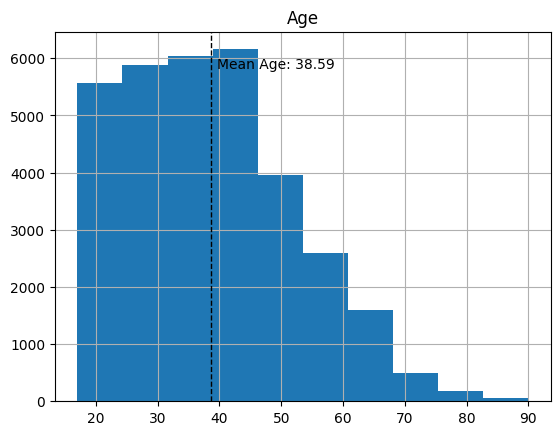

In [ ]:
plot_dist_mean(df['age'], 'Age')

**The data is slightly skewed and requires transformation.**

**Number of years of education.**

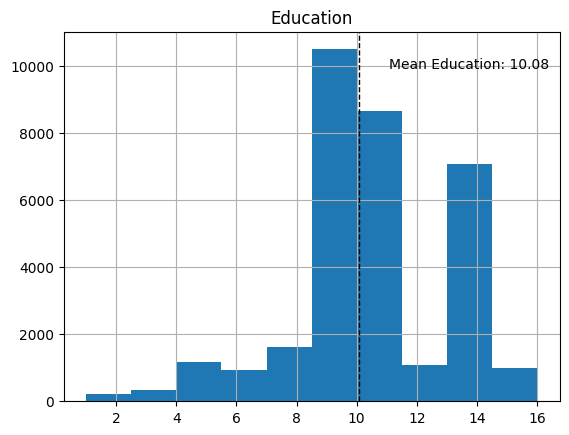

In [ ]:
plot_dist_mean(df['education-num'], 'Education')

**Need data transformation also.**

**Capital gain and capital loss.**

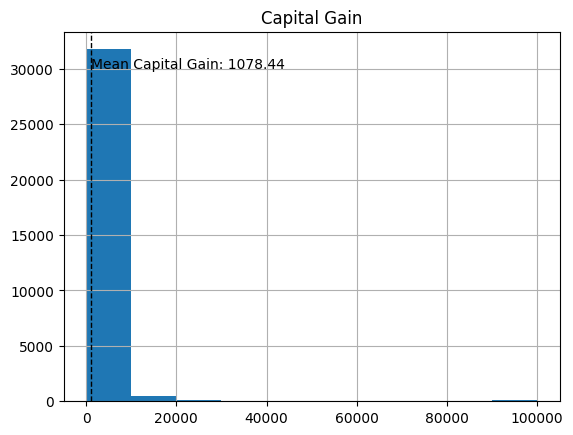

In [ ]:
plot_dist_mean(df['capital-gain'], 'Capital Gain')

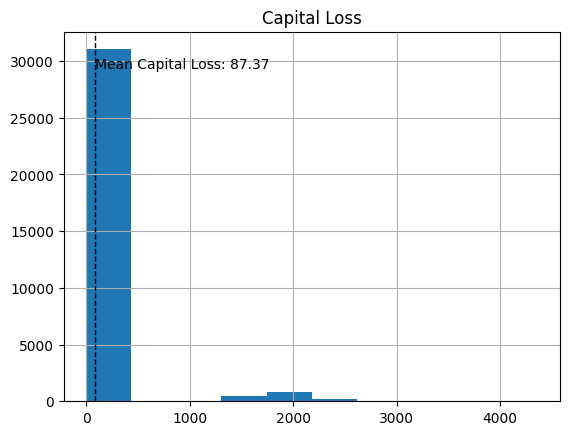

In [ ]:
plot_dist_mean(df['capital-loss'], 'Capital Loss')

In [ ]:
df['total_capital'] = df['capital-gain'] - df['capital-loss']

<ipython-input-17-439319d67c77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_capital'] = df['capital-gain'] - df['capital-loss']


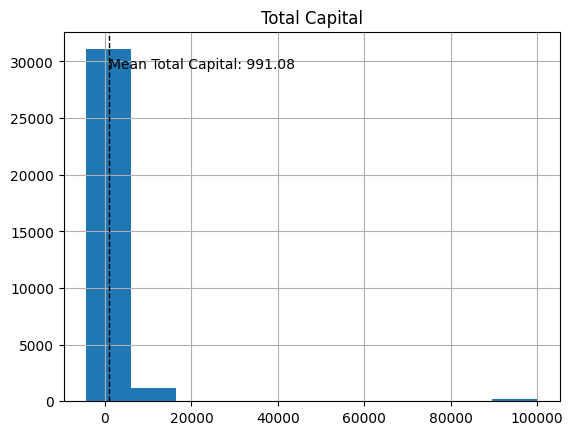

In [ ]:
plot_dist_mean(df['total_capital'], 'Total Capital')

**Hours of work per week.**

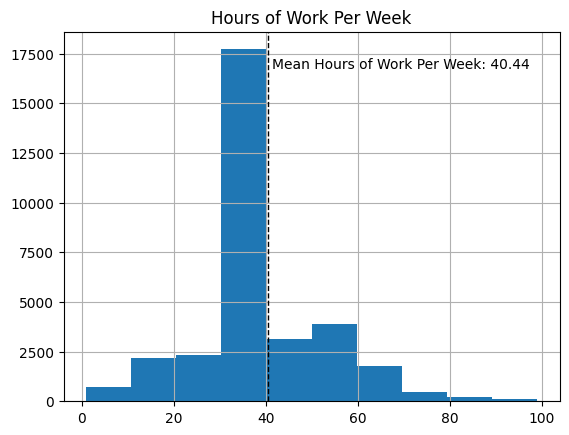

In [ ]:
plot_dist_mean(df['hours-per-week'], 'Hours of Work Per Week')

**Check thier correlation.**

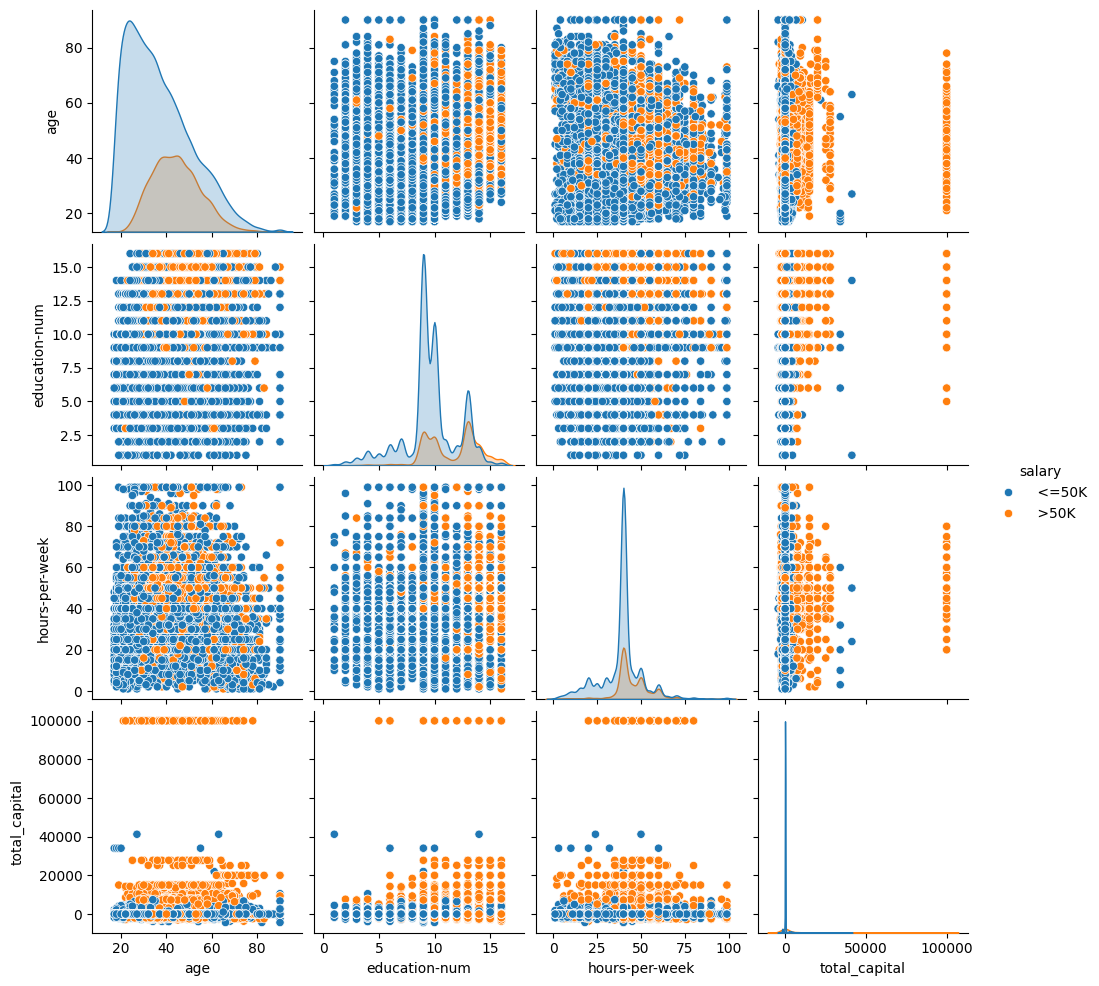

In [ ]:
import seaborn as sns

sns.pairplot(df[['age', 'education-num', 'hours-per-week', 'total_capital', 'salary']], hue="salary")
plt.show()

**Check the labels.**

In [ ]:
import plotly.express as px

salary_counts = df['salary'].value_counts()

fig = px.pie(values=salary_counts.values, names=salary_counts.index, title='Classified Salary')

fig.show()

In [ ]:
df['salary_encoded'] = df['salary'].str.strip().map({'<=50K': 0, '>50K': 1})

<ipython-input-21-7429c8d5009d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

salary_counts = df['salary_encoded'].value_counts()

fig = px.pie(values=salary_counts.values, names=salary_counts.index, title='Classified Encoded Salary')

fig.show()

**Plot the sankey diagram.**

In [ ]:
df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
dtype: int64

In [ ]:
df['workclass'].unique(), df['education'].unique(), df['marital-status'].unique(), df['occupation'].unique(),

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
        ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
        ' Preschool', ' 12th'], dtype=object),
 array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object))

In [ ]:
df['workclass'] = df['workclass'].apply(lambda x: ' ?_from_workclass' if x == ' ?' else x)

<ipython-input-25-b90892aff6e1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
nodes = []
nodes_color = []

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'salary']
colors = ['red', 'blue', 'green', 'grey', 'black', 'yellow', 'purple', 'pink']

for index, (color, cate) in enumerate(zip(colors, categorical_columns)):
  nodes.extend(list(df[cate].unique()))
  for i in list(df[cate].unique()):
    nodes_color.append(color)


In [ ]:
nodes_number = range(len(nodes))

In [ ]:
df_source = pd.DataFrame()
df_source['source'] = pd.concat([df['workclass'],df['education'],df['marital-status'],df['occupation'],df['relationship'],df['race'], df['sex']], axis=0).reset_index(drop = True).map(dict(zip(nodes, nodes_number)))
df_source['target'] = pd.concat([df['education'],df['marital-status'],df['occupation'],df['relationship'],df['race'],df['sex'], df['salary']], axis=0).reset_index(drop = True).map(dict(zip(nodes, nodes_number)))
df_source['value'] = 1

In [ ]:
df_source = df_source.groupby(['source', 'target']).sum().reset_index()

In [ ]:
import plotly.graph_objects as go


links = dict(source = df_source['source'], target = df_source['target'], value = df_source['value'])


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=5,
        thickness=25,
        line=dict(color="black", width=1),
        label=nodes,
        color=nodes_color),
    link=links )])


fig.update_layout(title_text="Sankey Diagram of Education, Sex, Workclass, Salary, and Race", font_size=10)
fig.show()

**Check the categorical data.**

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'total_capital', 'salary_encoded'],
      dtype='object')

In [ ]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
total_capital       210
salary_encoded        2
dtype: int64

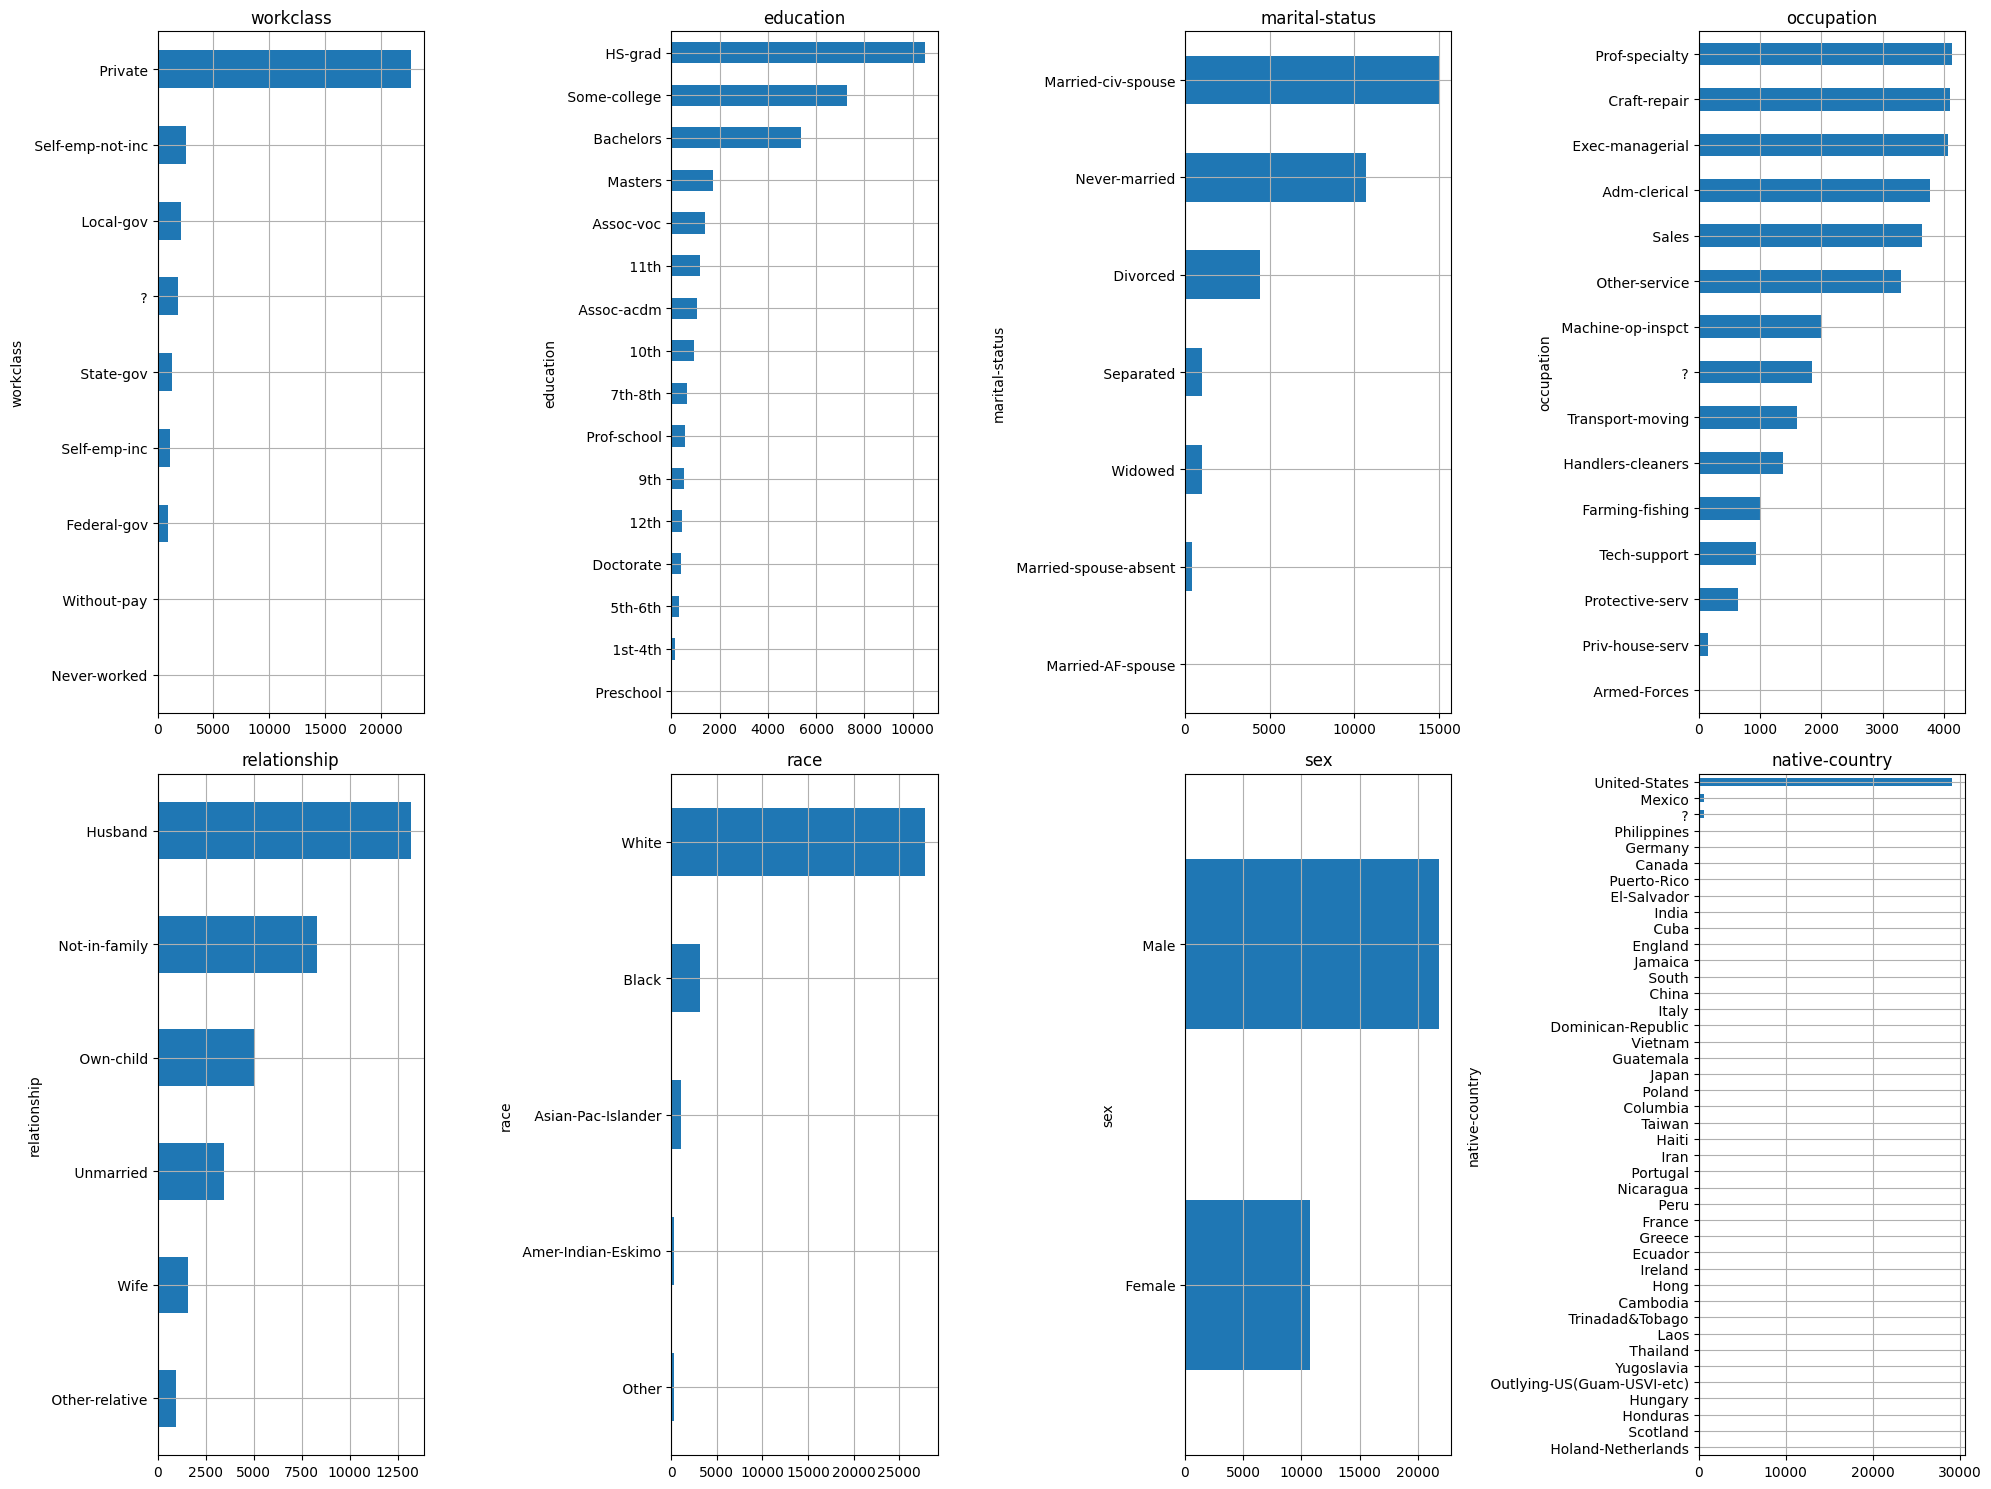

In [ ]:
import matplotlib.pyplot as plt

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    row = i // 4
    col = i % 4

    ax = axes[i]

    data[column].value_counts().sort_values().plot(kind='barh', ax=ax, grid = True)

    ax.set_title(column)

plt.tight_layout()

plt.show()

**Plot pie chart.**

In [ ]:
import plotly.express as px

def plot_pie_chart(dataframe, name):
  salary_counts = dataframe.value_counts()
  fig = px.pie(values=salary_counts.values, names=salary_counts.index, title=name)
  fig.show()

In [ ]:
for value in categorical_columns:
  plot_pie_chart(df[str(value)], str(value))

**One-hot encoding.**

In [ ]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)
one_hot_encoded_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,total_capital,salary_encoded,workclass_ ?_from_workclass,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,2174,0,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,0,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,0,0,40,>50K,0,1,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,0,0,40,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,0,0,20,<=50K,0,0,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_final = one_hot_encoded_df.drop(['capital-gain', 'capital-loss', 'salary'], axis=1)

In [ ]:
df_final

,age,fnlwgt,education-num,hours-per-week,total_capital,salary_encoded,workclass_ ?_from_workclass,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,40,2174,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,13,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,40,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,40,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,40,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,154374,9,40,0,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,151910,9,40,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,201490,9,20,0,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Split the data.**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_final.loc[:, df_final.columns != 'salary_encoded'], df_final['salary_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Perform data scaling.**

In [ ]:
numerical_column = ['age',	'fnlwgt', 'education-num', 'hours-per-week', 'total_capital']

In [ ]:
X_train.loc[:, ~X_train.columns.isin(numerical_column)]

,workclass_ ?_from_workclass,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
8919,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18119,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16494,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11269,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
30751,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15940,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
739,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7012,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_column = ['age', 'fnlwgt','education-num', 'hours-per-week', 'total_capital']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_column])
X_test_scaled = scaler.transform(X_test[numerical_column])

X_train_numeric_scaled = pd.DataFrame(X_train_scaled, columns = numerical_column)
X_test_numeric_scaled = pd.DataFrame(X_test_scaled, columns = numerical_column)

In [ ]:
X_train_categorical_scaled = X_train.loc[:, ~X_train.columns.isin(numerical_column)].reset_index(drop = True)
X_test_categorical_scaled = X_test.loc[:, ~X_test.columns.isin(numerical_column)].reset_index(drop = True)

In [ ]:
X_train_num_cate_scaled = pd.concat([X_train_numeric_scaled, X_train_categorical_scaled], axis =1)
X_test_num_cate_scaled = pd.concat([X_test_numeric_scaled, X_test_categorical_scaled], axis =1)

**To train the XGBoost model, we need to compute class weights to handle class imbalance.**

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

class_weights = compute_sample_weight('balanced', y_train)

**Train the model.**

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import random
random.seed(123)

param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20, 30],
    'subsample': [ 0.8, 1.0],
    'reg_alpha': [0.2, 0.7],
    'reg_lambda': [0.2, 0.7]}


model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=40, scoring='accuracy', cv=5, verbose=4)

random_search.fit(X_train_num_cate_scaled.values, y_train.values, sample_weight=class_weights)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_num_cate_scaled)

accuracy = accuracy_score(y_test.values, y_pred)
print("Best Model Parameters:", random_search.best_params_)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END max_depth=15, n_estimators=300, reg_alpha=0.2, reg_lambda=0.2, subsample=1.0;, score=0.842 total time=   3.9s
[CV 2/5] END max_depth=15, n_estimators=300, reg_alpha=0.2, reg_lambda=0.2, subsample=1.0;, score=0.852 total time=   3.8s
[CV 3/5] END max_depth=15, n_estimators=300, reg_alpha=0.2, reg_lambda=0.2, subsample=1.0;, score=0.846 total time=   6.4s
[CV 4/5] END max_depth=15, n_estimators=300, reg_alpha=0.2, reg_lambda=0.2, subsample=1.0;, score=0.848 total time=   3.9s
[CV 5/5] END max_depth=15, n_estimators=300, reg_alpha=0.2, reg_lambda=0.2, subsample=1.0;, score=0.853 total time=   6.7s
[CV 1/5] END max_depth=30, n_estimators=300, reg_alpha=0.7, reg_lambda=0.7, subsample=0.8;, score=0.842 total time=   4.5s
[CV 2/5] END max_depth=30, n_estimators=300, reg_alpha=0.7, reg_lambda=0.7, subsample=0.8;, score=0.852 total time=   4.5s
[CV 3/5] END max_depth=30, n_estimators=300, reg_alpha=0.7, reg_lambda=0.7, s

**Features selection.**

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_test_num_cate_scaled.columns, 'Importance': best_model.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance_df.head(5)

,Feature,Importance
32,marital-status_ Married-civ-spouse,0.412189
4,total_capital,0.053126
31,marital-status_ Married-AF-spouse,0.024126
2,education-num,0.016604
54,relationship_ Other-relative,0.016487


In [ ]:
feature_importance_df.tail(30)

,Feature,Importance
29,education_ Some-college,0.002287
26,education_ Masters,0.002279
25,education_ HS-grad,0.001609
23,education_ Bachelors,0.001510
89,native-country_ Japan,0.001319
96,native-country_ Poland,0.001157
93,native-country_ Outlying-US(Guam-USVI-etc),0.000000
99,native-country_ Scotland,0.000000
101,native-country_ Taiwan,0.000000
102,native-country_ Thailand,0.000000


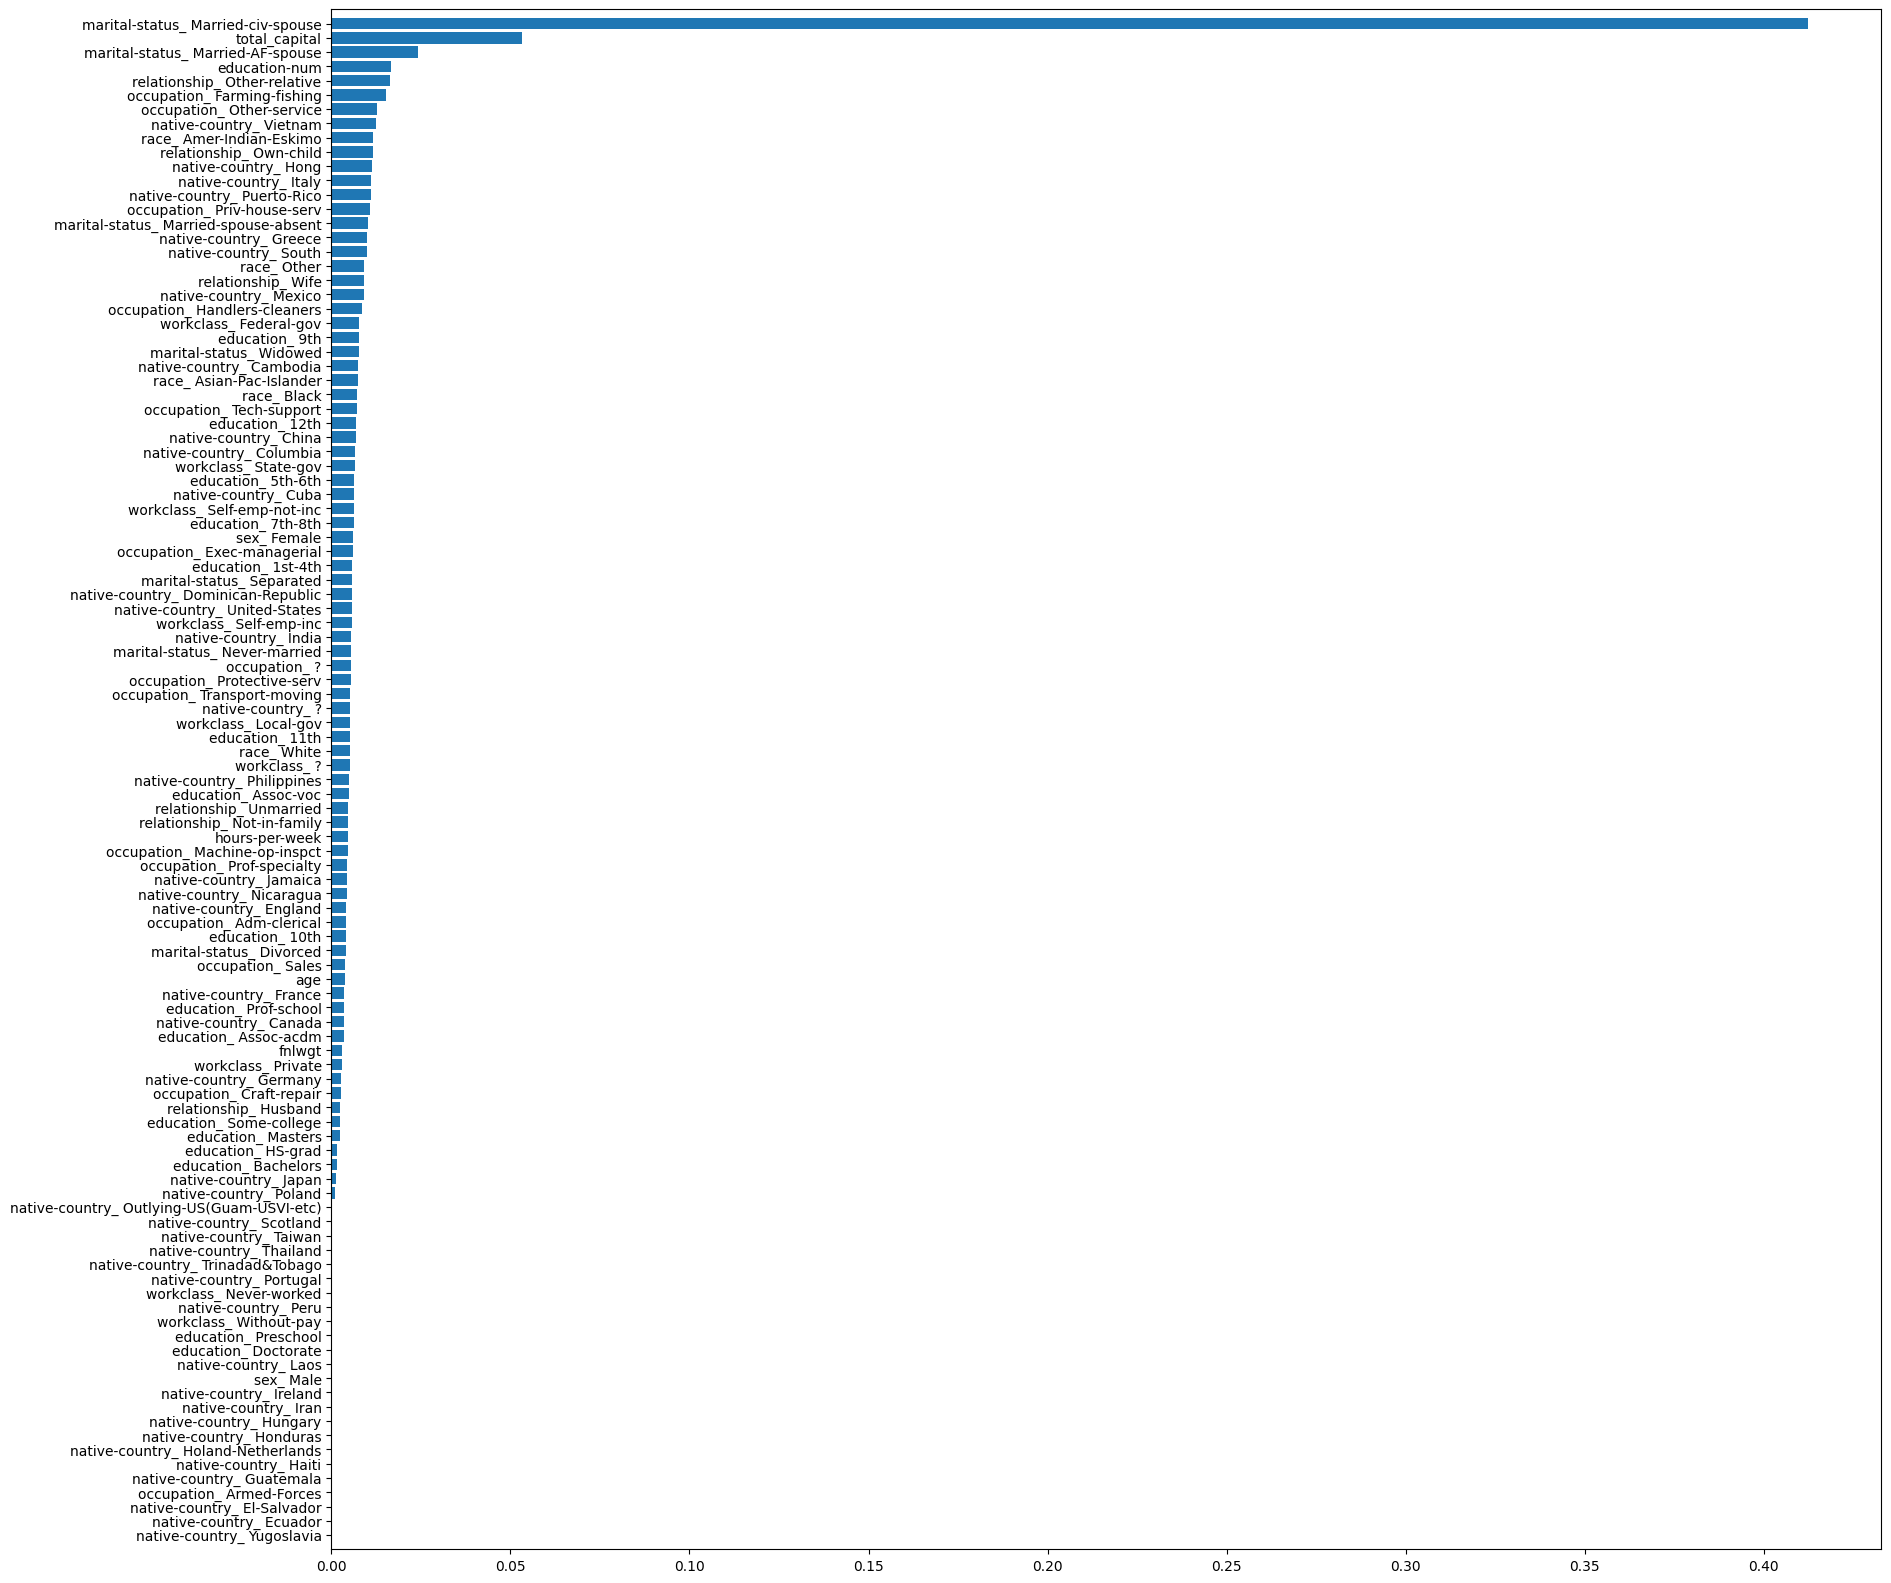

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.ylim([-1, feature_importance_df.shape[0]])

plt.gca().invert_yaxis()
plt.show()

**Native-country data have the lowest impact on classification, due to the fact that they have few observations.**